## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 
### Objective of the exercise 

The major objective of the case study is to -

1.Build an optimal logistic model that would assign a lead score between 0 and 100 to each lead generated , which could be in turn used by the company to determine the potential lead to be targetted .A high score would mean higher potential of the lead being converted .This would involve a logistic regression algorithm as it involves generation of scores.

2.Based on the modeling identify the important variables and provide feasible recommendations

### Major Steps involved in performing the model build -




## Step 1.Import Data and prepping the data set for modelling activity 

In [1]:
#Import important libraries 

import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data from csv file.

Leads = pd.read_csv('Leads.csv')

In [3]:
# Reading the first sample 5 records of the file to see a glimpse of the data in the dataset 
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking dimension of dataframe
Leads.shape

(9240, 37)

There are 9240 rows and 37 attributes in the leads file .Next would be to understand the file more 

In [5]:
# looking at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Understanding type of each attribute

Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2. Cleansing and preparing data for modelling

In [7]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Converting all the values to lower case
Leads= Leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [10]:
Leads=Leads.replace('select',np.nan) # converting 'select' to NaN as this value dont signify anything

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [11]:
Leads.nunique() # understanding the data pattern and identify attributes which has only unique values .we will remove these fields as they will not account more to the analysis further 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
Leads1= Leads.drop (['Magazine','Receive More Updates About Our Courses'],1)
# dropping variables with 1 unique value because they won't contribute to further analysis

In [13]:
Leads1.nunique() 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [14]:
Leads1= Leads.drop (['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)
# dropping variables with 1 unique value because they won't contribute to further analysis

In [15]:
Leads1.nunique() 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [16]:
# Checking the percentage of missing values
round(100*(Leads1.isnull().sum()/len(Leads1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# Removing all the columns that are no required and have 35% null values
Leads2 = Leads1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
Leads2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [18]:
round(100*(Leads2.isnull().sum()/len(Leads2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Above ,still we see attributes with huge null values. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.for now we will proceed with further analysis ..

In [19]:
# converting values to 'not provided' instead of null in the attributes which has >20% nulls.

Leads2['Specialization'] = Leads2['Specialization'].fillna('not provided') 
Leads2['What matters most to you in choosing a course'] = Leads2['What matters most to you in choosing a course'].fillna('not provided')
Leads2['Country'] = Leads2['Country'].fillna('not provided')
Leads2['What is your current occupation'] = Leads2['What is your current occupation'].fillna('not provided')
Leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [20]:
round(100*(Leads2.isnull().sum()/len(Leads2.index)), 2) # after conversion 

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [21]:
Leads2["Country"].value_counts() 
#Profiling Country field .Looks majority is from India. hence we can club the other countries as 'outside india'

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [22]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside"
    return category

Leads2['Country'] = Leads2.apply(lambda x:slots(x['Country']), axis = 1)
Leads2['Country'].value_counts()

india           6492
not provided    2461
outside          287
Name: Country, dtype: int64

In [23]:
Leads3 = Leads2[Leads2.isnull().sum(axis=1) <1]

round(100*(Leads3.shape[0])/(Leads.shape[0]),2)

98.2

In [24]:
# Removing Id values since they are unique for everyone
Leads_model = Leads3.drop('Prospect ID',1)
Leads_model.shape

(9074, 21)

### EDA Analysis :  Univariate Analysis  (Categorical Variables)


In [25]:
Leads_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

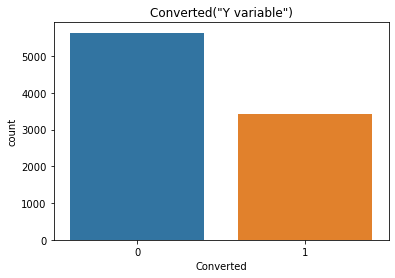

In [26]:
sns.countplot(Leads_model['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [27]:
# Finding out conversion rate
Converted = (sum(Leads_model['Converted'])/len(Leads_model['Converted'].index))*100
Converted

37.85541106458012

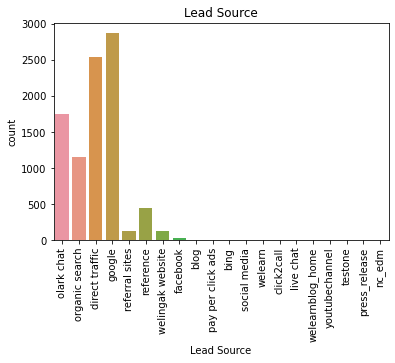

In [28]:
sns.countplot(Leads_model['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

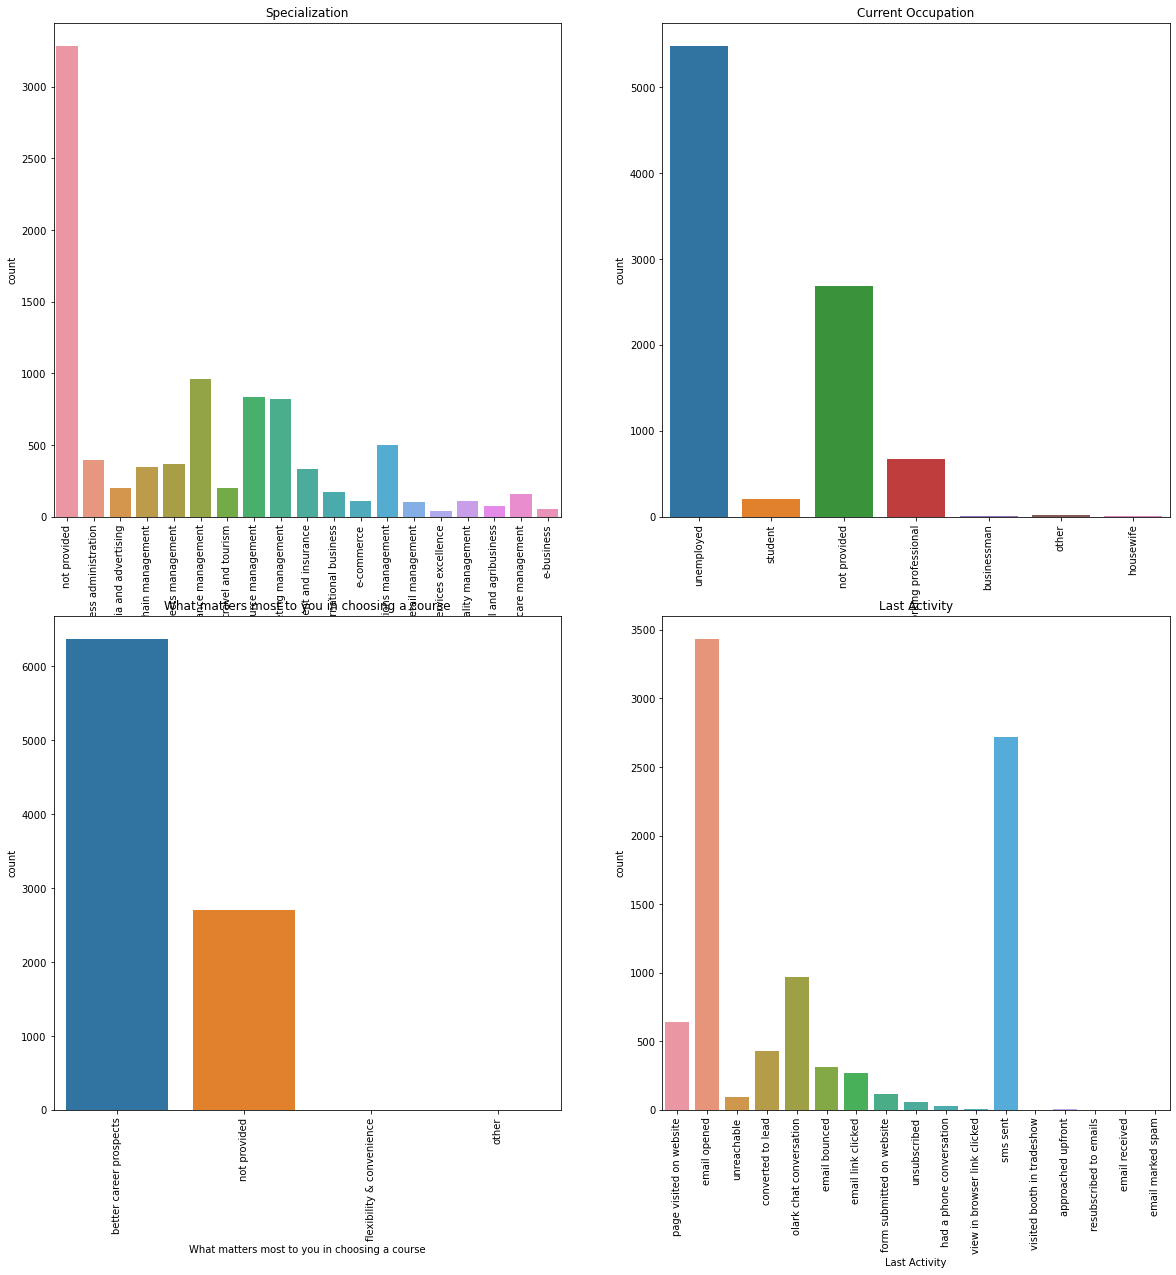

In [29]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(Leads_model['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Leads_model['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Leads_model['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Leads_model['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

### EDA - Numerical variable analysis 

In [30]:
Leads_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

TotalVisits,Total Time Spent on Website,Page Views Per Visit are the numeric variables per the info above. Profiling them next to see the distribution 

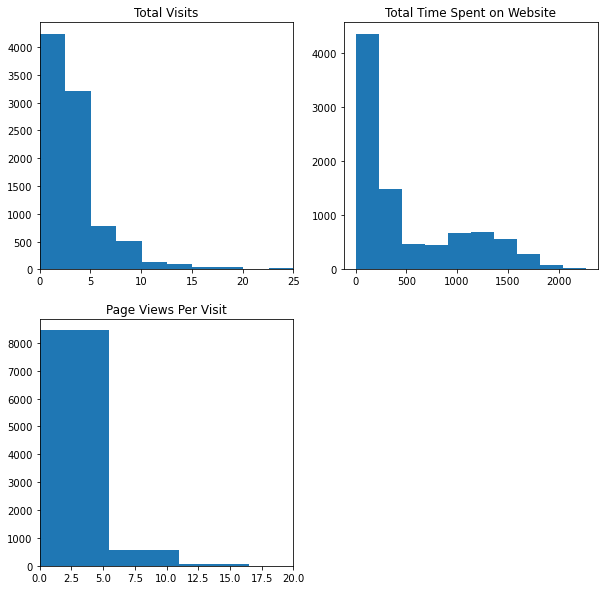

In [31]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Leads_model['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Leads_model['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Leads_model['Page Views Per Visit'], bins = 10)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Understanding the relation of the categorical variable comapred to "Converted"

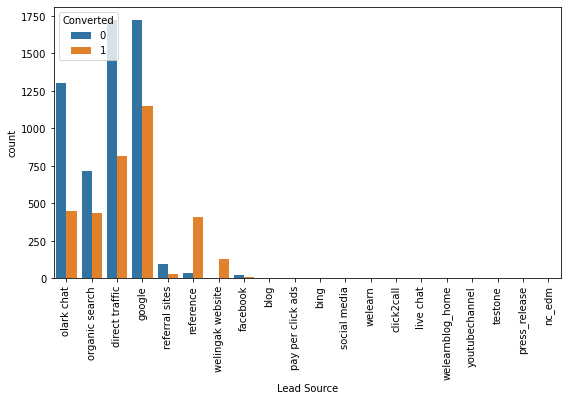

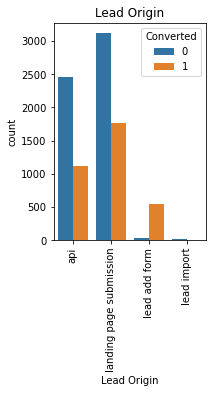

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =Leads_model)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.show()

Inference: Maximum Leads are generated by Google and Direct Traffic and most leads get conveted when the lead is originated from the landing page submission 

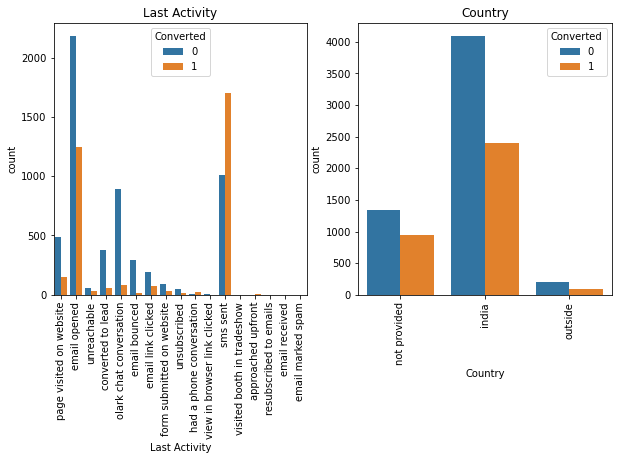

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

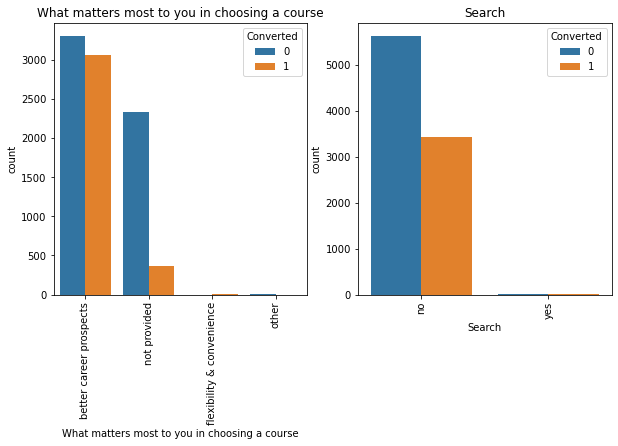

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

Inference: Maximum leads generated are unemployed and their conversion rate is more than 50%. Conversion rate of working professionals is very high . Most leads are converted for people who are looking for better career prospect 

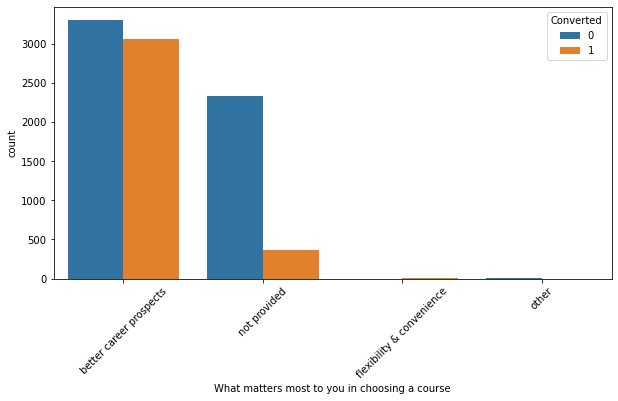

In [35]:
plt.figure(figsize=(10,5))
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data =Leads_model)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

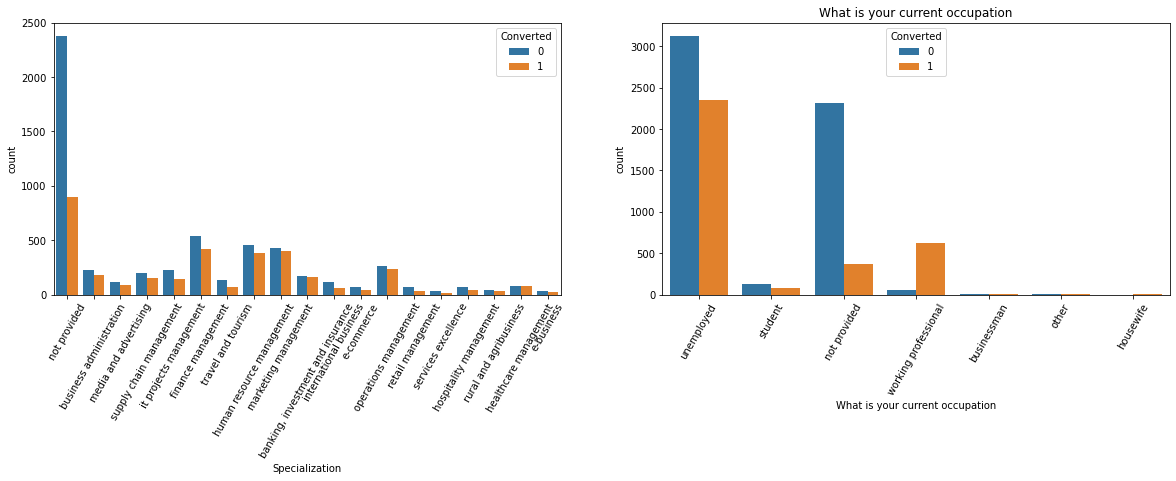

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
s1=sns.countplot(x= 'Specialization', hue='Converted' , data =Leads_model)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 60)
plt.title('What is your current occupation')

plt.show()

no such relevant inference could be drawn from above .Mostly unemployed are generating more leads

In [37]:
Leads_model['Last Activity'].value_counts()

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
unreachable                       90
unsubscribed                      59
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

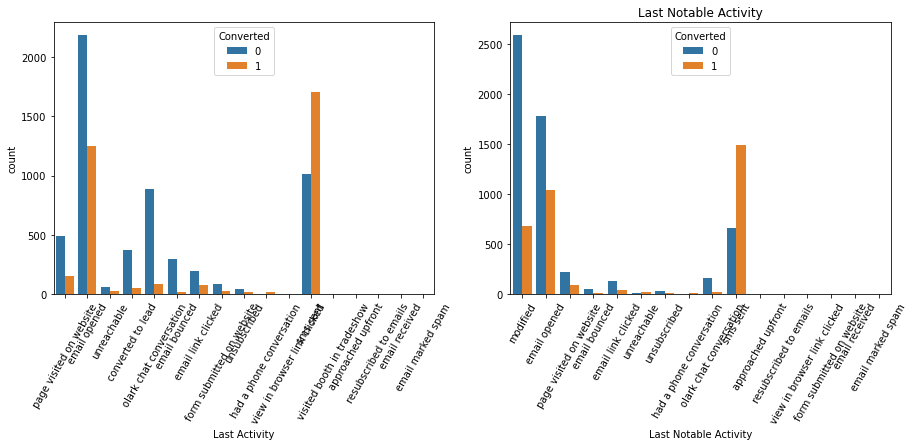

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
s1=sns.countplot(x= 'Last Activity', hue='Converted' , data =Leads_model)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads_model).tick_params(axis='x', rotation = 60)
plt.title('Last Notable Activity')


plt.show()

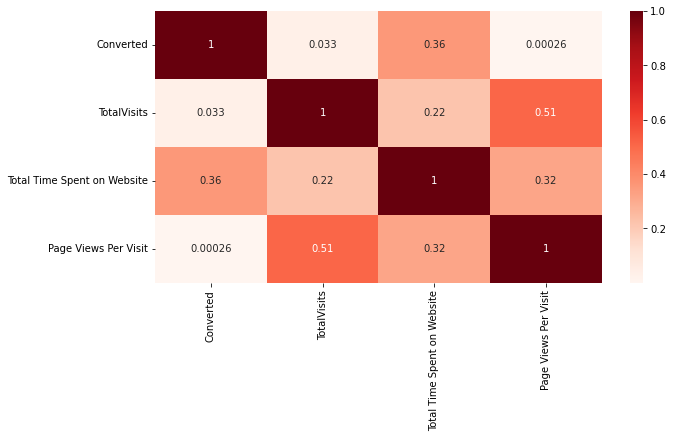

In [39]:

plt.figure(figsize=(10,5))
sns.heatmap(Leads_model.corr(), annot = True, cmap= 'Reds')
plt.show()

From the EDA analysis above its evident that there are many elements that have very little data and so will be of less relevance to our analysis

##  Outliers Analysis 

In [40]:
numeric = Leads_model[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


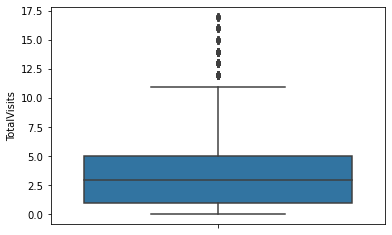

In [41]:
Leads_model = Leads_model[(Leads_model['TotalVisits'] <= Leads_model['TotalVisits'].quantile(0.99))]
sns.boxplot(y = Leads_model['TotalVisits'])
plt.show()

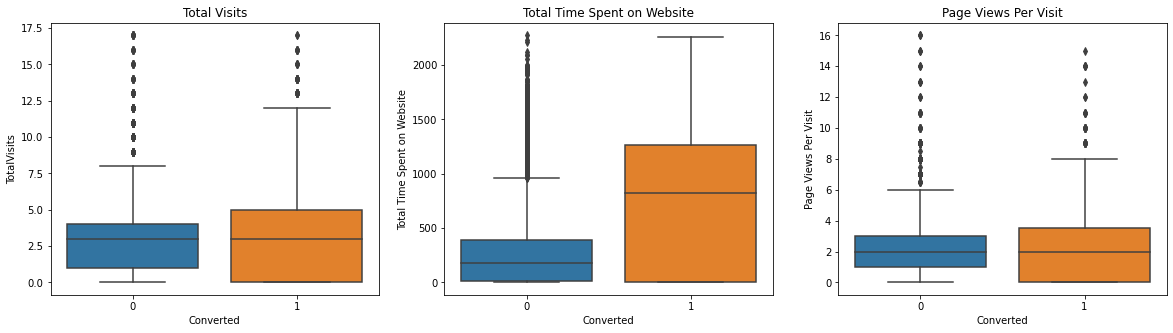

In [42]:
#visualising numerical variables w.r.t. Converted

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads_model)
plt.title('Total Visits')

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads_model)
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads_model)
plt.title('Page Views Per Visit')

plt.show()

Leads spending more time on the website tend to be converted.

In [43]:
Leads_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

In [44]:
Leads_model.loc[:, Leads_model.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Adding Dummies 

In [45]:
Leads_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

In [46]:
Leads_model.loc[:, Leads_model.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
#importing library splitting data
from sklearn.model_selection import train_test_split


In [48]:
# Creating dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Leads_model[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
Leads_model_dum = pd.concat([Leads_model, dummy], axis=1)
Leads_model_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [49]:
Leads_model_dum = Leads_model_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Leads_model_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Test Train split 

In [50]:
#Putting target variable in y
y = Leads_model_dum['Converted']

#Putting feature variable in X
X=Leads_model_dum.drop('Converted',1)

# Splitting the data into train and test (70 /30 percent breakup)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [51]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Feature scaling

In [53]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scaling the numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


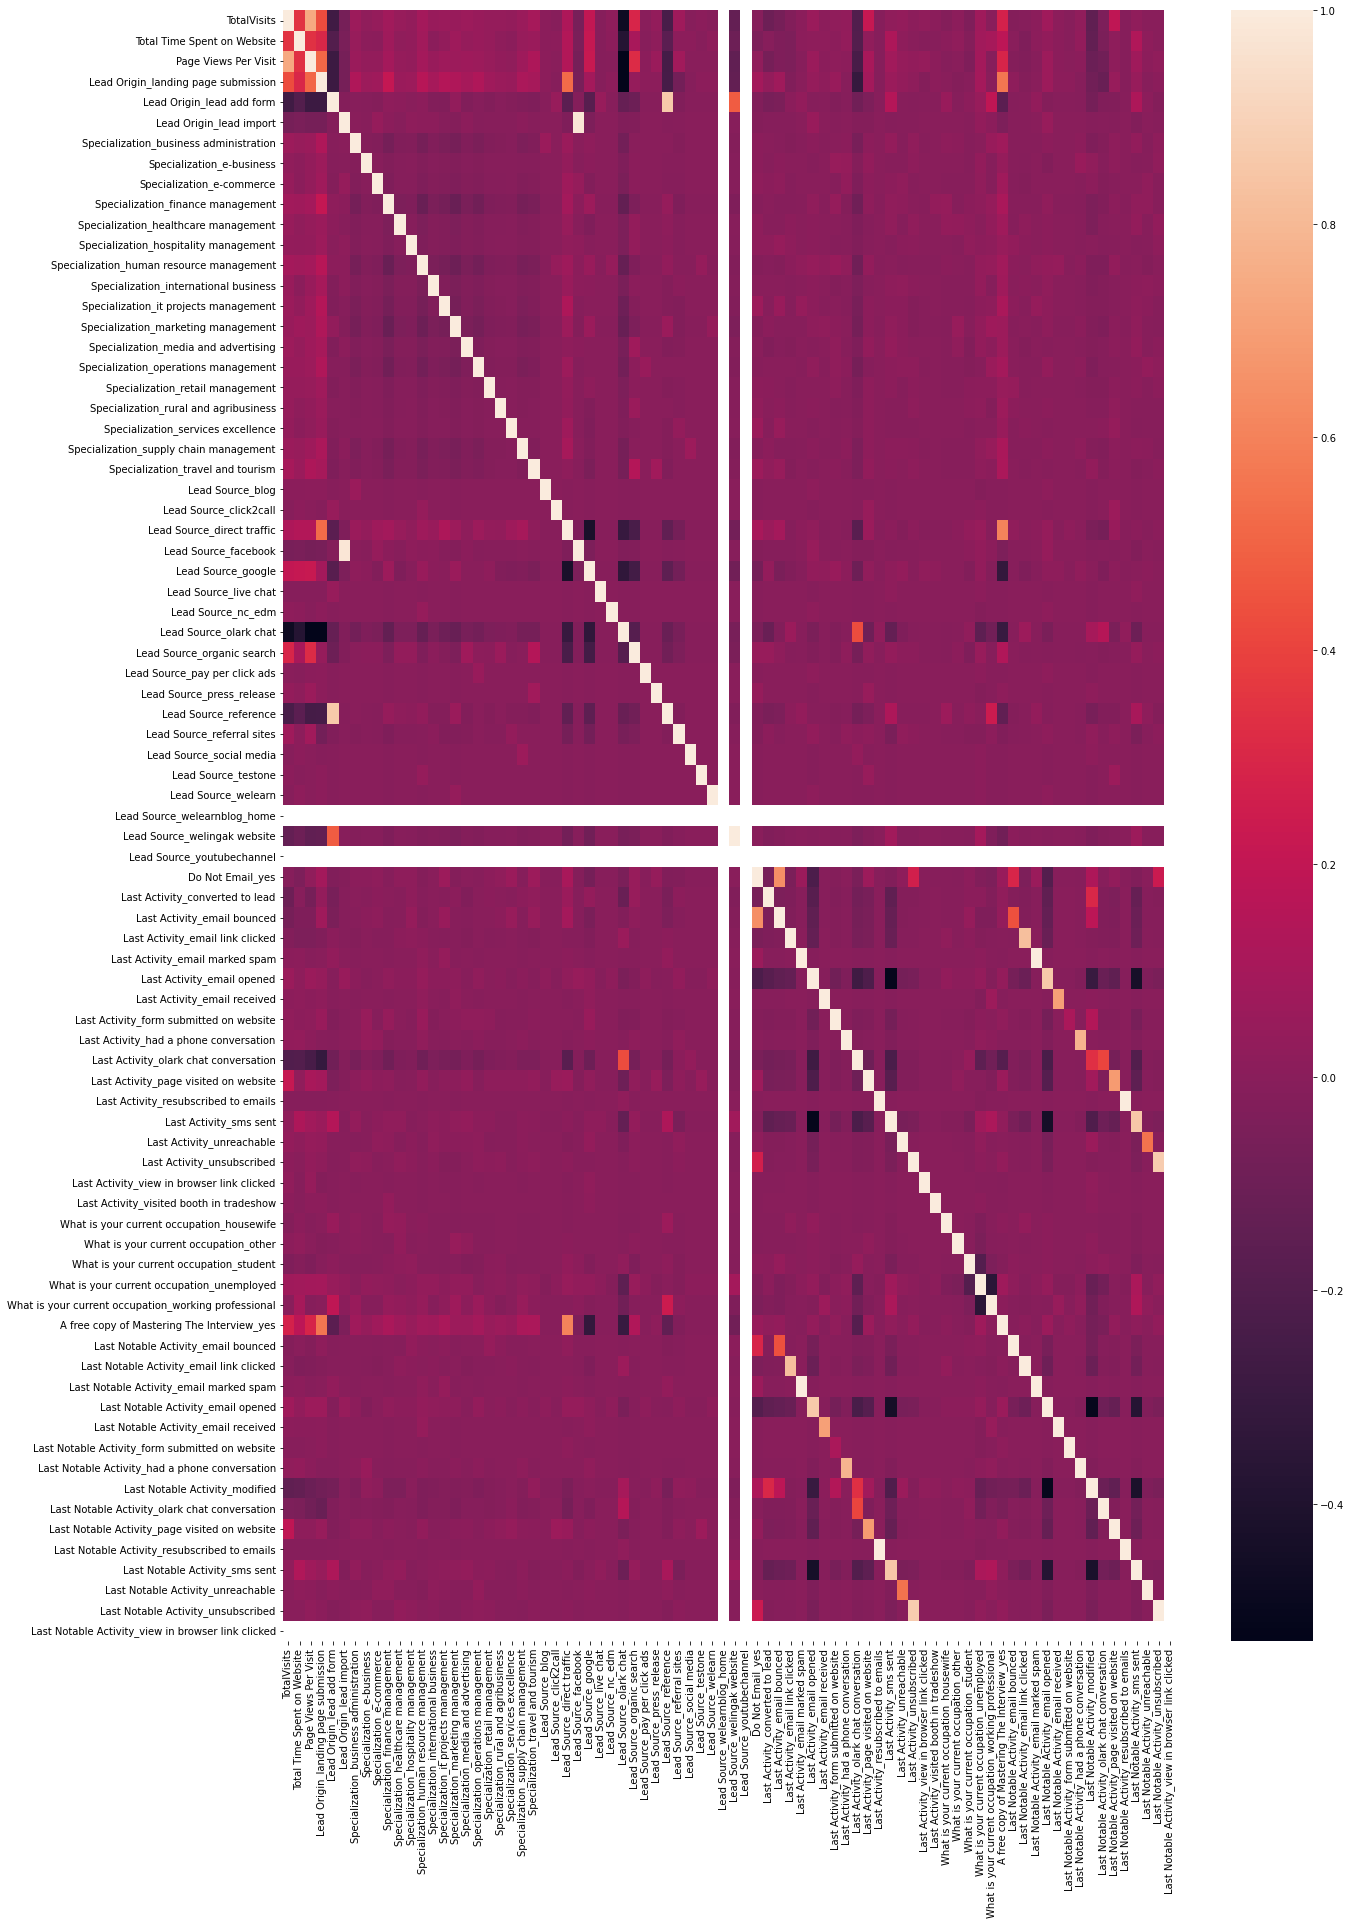

In [54]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Above correlation metrix shows a lot of variables and not so easy to interprete. Hence we keep the variables as is and move towards modelling activity to further find relevant variables.

### Feature Selection using RFE


In [55]:
# importing necessary library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 27),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 29),
 ('Specialization_e-business', False, 23),
 ('Specialization_e-commerce', False, 34),
 ('Specialization_finance management', False, 26),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 54),
 ('Specialization_human resource management', False, 28),
 ('Specialization_international business', False, 32),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 24),
 ('Specialization_media and advertising', False, 50),
 ('Specialization_operations management', False, 35),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 30),
 ('Specialization_servi

In [57]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [58]:
col # these are the list of attributes as selected as part of RFE 

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [59]:
# Selecting columns selected by RFE
X_train = X_train[col]

### Building Model

In [60]:
# importing necessary library
import statsmodels.api as sm

#Model 1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.1
Date:                Tue, 24 Jan 2023   Deviance:                       5252.2
Time:                        18:36:03   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0499      0.089     -0.558      0.577      -0.225       0.125
TotalVisits                                              1.3774      0.288      4.782      0.000       0.813       1.942
Total Time Spent on Website                              4.2241      0.157     26.823      0.000       3.915       4.533
Page Views Per Visit                                    -3.3828      0.420     -8.061      0.000      -4.205      -2.560
Lead Origin_lead add form                                3.5518      0.252     14.068      0.000       3.057       4.047
Lead Source_direct traffic                              -0.5590      0.078     -7.135      0.000      -0.713      -0.405
Lead Source_welingak website                             2.4910      1.043      2.388      0.017       0.447       4.535
Do Not Email_yes                                        -1.7753      0.177    -10.034      0.000      -2.122      -1.429
Last Activity_olark chat conversation                   -0.9804      0.191     -5.144      0.000      -1.354      -0.607
What is your current occupation_housewife               22.2913   1.76e+04      0.001      0.999   -3.46e+04    3.46e+04
What is your current occupation_working professional     2.7197      0.189     14.384      0.000       2.349       3.090
Last Notable Activity_email link clicked                -1.9390      0.268     -7.223      0.000      -2.465      -1.413
Last Notable Activity_email opened                      -1.4133      0.089    -15.922      0.000      -1.587      -1.239
Last Notable Activity_modified                          -1.9367      0.097    -19.900      0.000      -2.127      -1.746
Last Notable Activity_olark chat conversation           -1.6887      0.373     -4.530      0.000      -2.419      -0.958
Last Notable Activity_page visited on website           -2.0669      0.212     -9.735      0.000      -2.483      -1.651
========================================================================================================================
"""

In [61]:
# Dropping the variables with p-values greater than 0.05
X_train_1 = X_train.drop(['What is your current occupation_housewife'],axis=1)
X_train_1.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

## Model 2

In [62]:
X_train_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Tue, 24 Jan 2023   Deviance:                       5258.7
Time:                        18:36:03   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0509      0.089     -0.569      0.569      -0.226       0.124
TotalVisits                                              1.3677      0.288      4.749      0.000       0.803       1.932
Total Time Spent on Website                              4.2290      0.157     26.861      0.000       3.920       4.538
Page Views Per Visit                                    -3.3734      0.419     -8.042      0.000      -4.196      -2.551
Lead Origin_lead add form                                3.5766      0.252     14.188      0.000       3.083       4.071
Lead Source_direct traffic                              -0.5582      0.078     -7.131      0.000      -0.712      -0.405
Lead Source_welingak website                             2.4649      1.043      2.363      0.018       0.421       4.509
Do Not Email_yes                                        -1.7777      0.177    -10.045      0.000      -2.125      -1.431
Last Activity_olark chat conversation                   -0.9835      0.191     -5.161      0.000      -1.357      -0.610
What is your current occupation_working professional     2.7168      0.189     14.367      0.000       2.346       3.087
Last Notable Activity_email link clicked                -1.9278      0.267     -7.227      0.000      -2.451      -1.405
Last Notable Activity_email opened                      -1.4102      0.089    -15.892      0.000      -1.584      -1.236
Last Notable Activity_modified                          -1.9330      0.097    -19.873      0.000      -2.124      -1.742
Last Notable Activity_olark chat conversation           -1.6847      0.373     -4.519      0.000      -2.415      -0.954
Last Notable Activity_page visited on website           -2.0652      0.212     -9.726      0.000      -2.481      -1.649
========================================================================================================================
"""

In [63]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.26
0,TotalVisits,5.25
1,Total Time Spent on Website,2.02
11,Last Notable Activity_modified,1.90
7,Last Activity_olark chat conversation,1.71
10,Last Notable Activity_email opened,1.52
3,Lead Origin_lead add form,1.49
4,Lead Source_direct traffic,1.46
5,Lead Source_welingak website,1.34
12,Last Notable Activity_olark chat conversation,1.34


Removing attributes with vif >5 and all p-values are <0.05.and reiterate

In [65]:
X_train_2 = X_train_1.drop(['Page Views Per Visit'],axis=1)
X_train_2.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [66]:
#Model 3 :  Refit the model with the new set of features
    
X_train_sm = sm.add_constant(X_train_2)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.0
Date:                Tue, 24 Jan 2023   Deviance:                       5326.0
Time:                        18:36:04   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2713      0.085     -3.186      0.001      -0.438      -0.104
TotalVisits                                             -0.2148      0.217     -0.992      0.321      -0.639       0.210
Total Time Spent on Website                              4.0568      0.154     26.368      0.000       3.755       4.358
Lead Origin_lead add form                                3.7464      0.251     14.906      0.000       3.254       4.239
Lead Source_direct traffic                              -0.5699      0.078     -7.347      0.000      -0.722      -0.418
Lead Source_welingak website                             2.4634      1.043      2.362      0.018       0.419       4.507
Do Not Email_yes                                        -1.7748      0.175    -10.154      0.000      -2.117      -1.432
Last Activity_olark chat conversation                   -0.8634      0.190     -4.548      0.000      -1.236      -0.491
What is your current occupation_working professional     2.6939      0.188     14.317      0.000       2.325       3.063
Last Notable Activity_email link clicked                -1.8062      0.265     -6.819      0.000      -2.325      -1.287
Last Notable Activity_email opened                      -1.3495      0.088    -15.399      0.000      -1.521      -1.178
Last Notable Activity_modified                          -1.8865      0.096    -19.597      0.000      -2.075      -1.698
Last Notable Activity_olark chat conversation           -1.5240      0.365     -4.179      0.000      -2.239      -0.809
Last Notable Activity_page visited on website           -1.7007      0.202     -8.421      0.000      -2.097      -1.305
========================================================================================================================
"""

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.37
1,Total Time Spent on Website,1.96
10,Last Notable Activity_modified,1.86
6,Last Activity_olark chat conversation,1.70
9,Last Notable Activity_email opened,1.50
2,Lead Origin_lead add form,1.49
3,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.34
11,Last Notable Activity_olark chat conversation,1.34
7,What is your current occupation_working profes...,1.17


#### Looks like All the VIF values are good and all the p-values are below 0.05. So we can fix model

## Predictions


In [68]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.124450
3267    0.997371
5653    0.359662
5072    0.165093
3704    0.182967
1790    0.148359
2482    0.190060
1694    0.103605
8768    0.164771
9225    0.012180
dtype: float64

In [69]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12444988, 0.99737096, 0.35966158, 0.16509346, 0.18296711,
       0.14835868, 0.19006018, 0.10360474, 0.16477109, 0.0121805 ])

In [70]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.124450
1,1,0.997371
2,1,0.359662
3,0,0.165093
4,0,0.182967


In [71]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.124450,0
1,1,0.997371,1
2,1,0.359662,0
3,0,0.165093,0
4,0,0.182967,0


##  Model Evaluation

In [72]:
from sklearn import metrics

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3475,  440],
       [ 829, 1549]], dtype=int64)

In [73]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.798347370093755

Around 80% accurate .analyzing other evaluation factors as well 

In [74]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [75]:
#Sensitivity
TP/(TP+FN)


0.6513877207737595

In [76]:
#Specificity
TN/(TN+FP)

0.8876117496807152

### Note -With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.

### Optimise Cut off (ROC Curve) 
Finding the accurate optimum one

In [77]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

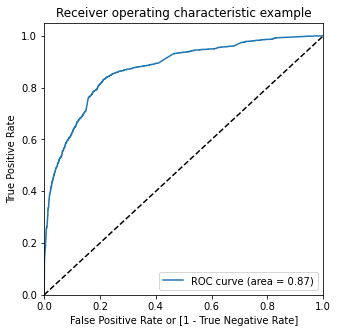

In [79]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Note - Area under ROC is 0.87 ,pretty decent value 

In [80]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.124450,0,1,1,0,0,0,0,0,0,0,0
1,1,0.997371,1,1,1,1,1,1,1,1,1,1,1
2,1,0.359662,0,1,1,1,1,0,0,0,0,0,0
3,0,0.165093,0,1,1,0,0,0,0,0,0,0,0
4,0,0.182967,0,1,1,0,0,0,0,0,0,0,0


In [81]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.542349,0.978133,0.277650
0.2,0.2,0.751311,0.878049,0.674330
0.3,0.3,0.799619,0.842725,0.773436
0.4,0.4,0.809630,0.784272,0.825032
0.5,0.5,0.798347,0.651388,0.887612
0.6,0.6,0.791991,0.567704,0.928225
0.7,0.7,0.780709,0.491169,0.956577
0.8,0.8,0.764024,0.417578,0.974457
0.9,0.9,0.714762,0.260723,0.990549


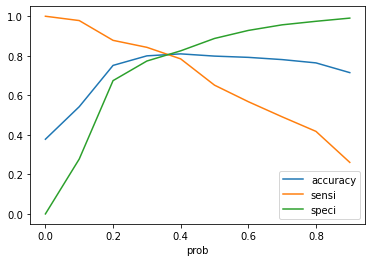

In [82]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Optimal cutoff is 0.35

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.124450,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.997371,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.359662,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.165093,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.182967,0,1,1,0,0,0,0,0,0,0,0,0


In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8051803591291912

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3131,  784],
       [ 442, 1936]], dtype=int64)

In [86]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.8141295206055509

In [88]:
# Calculating the specificity
TN/(TN+FP)

0.7997445721583653

#### Note With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Predictions on the test data set

In [89]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [90]:
col = X_train_2.columns

In [91]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3308,1.0,0.117647,0.050176,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,1,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,1,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,1,0,0,0,1,0,0,0,0,0


In [92]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.191154
1,1,0.432593
2,1,0.373483
3,0,0.046476
4,0,0.324474


In [93]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.191154,0
1,1,0.432593,1
2,1,0.373483,1
3,0,0.046476,0
4,0,0.324474,0
...,...,...,...
2693,1,0.135322,0
2694,1,0.803979,1
2695,0,0.041303,0
2696,1,0.966238,1


In [94]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8031875463306153

In [95]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1339,  338],
       [ 193,  828]], dtype=int64)

In [96]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [97]:
# Calculating the sensitivity
TP/(TP+FN)

0.8109696376101861

In [98]:
# Calculating the specificity
TN/(TN+FP)

0.7984496124031008

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision Recall

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3475,  440],
       [ 829, 1549]], dtype=int64)

In [100]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7787833081950729

In [101]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6513877207737595

In [102]:
from sklearn.metrics import precision_recall_curve

In [103]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

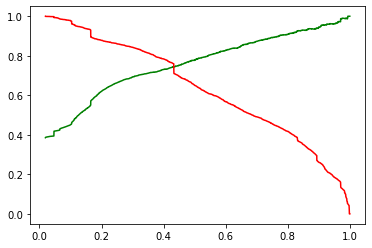

In [105]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.124450,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.997371,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.359662,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.165093,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.182967,0,1,1,0,0,0,0,0,0,0,0,0


In [107]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.808994120451295

In [108]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3241,  674],
       [ 528, 1850]], dtype=int64)

In [109]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [110]:
TP / (TP + FP) # Precision

0.7329635499207607

In [111]:
#Recall = sensitivity
TP / (TP + FN)

0.7779646761984861

In [112]:
#specificity
TN/ (TN+FP)

0.8278416347381865

With the current cut off as 0.42 we have Precision around 73% and Recall around 78%

## Prediction on Test set

In [113]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.191154
1,1,0.432593
2,1,0.373483
3,0,0.046476
4,0,0.324474


In [114]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.191154,0
1,1,0.432593,1
2,1,0.373483,0
3,0,0.046476,0
4,0,0.324474,0
...,...,...,...
2693,1,0.135322,0
2694,1,0.803979,1
2695,0,0.041303,0
2696,1,0.966238,1


In [115]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8009636767976279

In [116]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1371,  306],
       [ 231,  790]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7208029197080292

In [119]:
#Recall=sensitivity
TP / (TP + FN)

0.7737512242899118

In [120]:
#specificity
TN/ (TN+FP)

0.817531305903399

With the current cut off as 0.42 we have Precision around 72% and Recall around 78% on the test dataset 

After running the model on the Test Data these are the figures we obtain
<br>
Train Set:
<br>
Accuracy =0.808<br>
Sensitivity =0.777<br>
Specificity =0.827<br>
<br>
Test Set:
<br>
Accuracy =0.800<br>
Sensitivity =0.773<br>
Specificity =0.817<br>

### Key Takeaways from the excercise - 
1.The Optimum cutoff is around 0.42 with precision of nearly 72% and recall of around 78% 
<br>
2.Attributes that mattered the most for lead conversions -<br>
  2.1 Total number of visits , total time spent on the website 
   <br>2.2.when the lead source came from Google, direct traffic , organic search .<br>2.3.when the last activity was sms,olark chat conversion <br> 2.4.When the lead origin is Lead add format<br>2.5. current occupation is working professional <br>
   3. Using such parameters , the company could actually set up there business model inorder to have more leads converted 